# Exploratory data analysis

We have 5 datasets: 

1. cyberpol
2. dataset_5_1
3. autotrain_TG_sentiment
4. emotions_sentiment_youscan
5. kyiv_digital_sentiment_annotation
6. TRWU - Telegram news about the Russian war in Ukraine


This file contains EDA of all of them in the specified order. 

EDA steps: 
1. Understand the structure (columns or folders structure, classes distribution)
2. Manual inspection of examples
3. Texts length distribution
4. Language detection
5. Word clouds with stop-words filtering
6. Text similarity analysis (check for dupllicates or nearly duplicates) -- TBD

In [1]:
import pandas as pd
import numpy as np
import os
import datetime


from utilities.useful_functions import extract_website_name, create_boxplot, create_wordcloud, detect_language_safe

In [2]:
ru_stopwords = pd.read_csv('ru_stopwords.csv')

In [3]:
ua_stopwords = pd.read_csv('ua_stopwords.csv')

### Cyberpol dataset overview

In [22]:
cyberpol = pd.read_csv('./data_provided/cyberpol/cyberpol-train.csv')

In [23]:
cyberpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source_id        3260 non-null   int64 
 1   source_url       3260 non-null   object
 2   source_category  3260 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.5+ KB


In [24]:
cyberpol

,source_id,source_url,source_category
0,133653,https://twitter.com/IFR2022,AGGRESSIVE_INFORMATION
1,39644,https://t.me/warfakeskrm,RESTRAINED_INFORMATION
2,245395,https://t.me/od_patrolpolice,SAFE_CONTENT
3,252210,https://t.me/trech_kich,SPAM
4,226108,https://t.me/sitreports,RESTRAINED_INFORMATION
...,...,...,...
3255,39593,https://t.me/subbotin_ru,RESTRAINED_INFORMATION
3256,238603,https://t.me/CinCAFU,SAFE_CONTENT
3257,144255926,https://twitter.com/Opoveshenie,AGGRESSIVE_INFORMATION
3258,240164,https://t.me/wyattreed13,RESTRAINED_INFORMATION


In [25]:
cyberpol['source_category'].value_counts()

source_category
AGGRESSIVE_INFORMATION                  1499
RESTRAINED_INFORMATION                  1174
AGGRESSIVE_MILITARY                      108
RESTRAINED_MILITARY                      107
SAFE_CONTENT                              91
ENTITIES_PROMOTING_VIOLENCE_AND_HATE      83
UNRECOGNIZED_REPUBLICS                    66
SPAM                                      54
VIOLENCE                                  31
COORDINATION_OF_ATTACKS                   23
PERSONAL_INFORMATION                      17
CYBER_ATTACK_COORDINATION                  7
Name: count, dtype: int64

In [26]:
cyberpol['website'] = cyberpol['source_url'].apply(extract_website_name)

In [27]:
cyberpol['website'].value_counts()

website
t           1843
twitter     1320
facebook      97
Name: count, dtype: int64

The dataset contains information about 3260 Telegram, Twitter and Facebook channels and their categories specified. Most of channels publishes aggresive or restrained information. 

Possible use cases: 
1. Channel type classifier training
2. As a list of sources for parsing respective content  

### dataset_5_1 overview

The dataset divided into TEST and TRAIN parts. The data is in the respective folders and additionally divided into 2 folders with classes: positive and negative.

##### Initial structuring into a pandas dataframe

In [35]:
#Define the folder path for dataset
data_path = 'data_provided\\dataset_5_1'

In [36]:
data = []

In [39]:
# Loop through the folder structure
for data_folder in ['test', 'train']:
    print(data_folder)

    folder_path = os.path.join(data_path, data_folder)
    
    for sentiment_class, sentiment_label in [('pos', 'positive'), ('neg', 'negative')]:
        print('Reading:', sentiment_label, 'at time:', datetime.datetime.now())
        
        sentiment_path = os.path.join(folder_path, sentiment_class)
        for text_file_name in os.listdir(sentiment_path):
            if text_file_name.endswith('.txt'):
                text_file_path = os.path.join(sentiment_path, text_file_name)
                with open(text_file_path, 'r', encoding='utf-8') as file:
                    text_file_content = file.read()
                data.append({
                    'data_folder': data_folder,
                    'text_file_name': text_file_name,
                    'text_file_content': text_file_content,
                    'sentiment_class': sentiment_label
                })

test
Reading: positive at time: 2025-01-04 22:45:51.370165
Reading: negative at time: 2025-01-04 22:45:51.534925
train
Reading: positive at time: 2025-01-04 22:45:55.045952
Reading: negative at time: 2025-01-04 22:46:29.086793


In [40]:
df = pd.DataFrame(data, columns=['data_folder', 'text_file_name', 'text_file_content', 'sentiment_class'])

In [45]:
# df.to_parquet('./data_provided/dataset_5_1/dataset_5_1.parquet')
#let's save the structured version of the dataset to make it be usable faster in the future 

##### Analysis steps

**Understand the structure**

In [5]:
df = pd.read_parquet('data_provided/dataset_5_1/dataset_5_1.parquet')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13114 entries, 0 to 13113
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data_folder        13114 non-null  object
 1   text_file_name     13114 non-null  object
 2   text_file_content  13114 non-null  object
 3   sentiment_class    13114 non-null  object
dtypes: object(4)
memory usage: 409.9+ KB


In [7]:
df.isna().sum()

data_folder          0
text_file_name       0
text_file_content    0
sentiment_class      0
dtype: int64

In [8]:
df

,data_folder,text_file_name,text_file_content,sentiment_class
0,test,z_1076.txt,посол украины в австралии призвал выгнать от...,positive
1,test,z_1085.txt,россия и украина стали чаще обмениваться вое...,positive
2,test,z_1097.txt,на главного редактора журнала театр марину...,positive
3,test,z_1100.txt,россия утверждает что на территории запорож...,positive
4,test,z_1112.txt,полиция крыма опровергла что российского во...,positive
...,...,...,...,...
13109,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5704.txt,набирает обороты скандал якобы личный т...,negative
13110,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5705.txt,русский против копателя ч рного моря ...,negative
13111,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5706.txt,военкор kp ru дмитрий стешин побывал...,negative
13112,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5707.txt,важно лживый фейковый канал операция z...,negative


In [9]:
df['data_folder'].value_counts()

data_folder
train    9127
test     3987
Name: count, dtype: int64

In [10]:
df['sentiment_class'].value_counts()

sentiment_class
negative    6848
positive    6266
Name: count, dtype: int64

**Manual inspection of examples**

In [11]:
df.loc[(df['sentiment_class'] == 'positive')]

,data_folder,text_file_name,text_file_content,sentiment_class
0,test,z_1076.txt,посол украины в австралии призвал выгнать от...,positive
1,test,z_1085.txt,россия и украина стали чаще обмениваться вое...,positive
2,test,z_1097.txt,на главного редактора журнала театр марину...,positive
3,test,z_1100.txt,россия утверждает что на территории запорож...,positive
4,test,z_1112.txt,полиция крыма опровергла что российского во...,positive
...,...,...,...,...
8230,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5188.txt,жена неонациста капитана вс рф мангушева заяв...,positive
8231,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5189.txt,московский комсомолец и lenta сообщают что ...,positive
8232,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5190.txt,военкора rt валентина горшенина задержали в ...,positive
8233,train,╨▓╨╛╨╡╨╜╨║╨╛╤Ç_5191.txt,после публикации новости об ударе по штабу чвк...,positive


In [12]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][8230]

'жена неонациста  капитана вс рф мангушева заявила  что над ним устроили расправу в тылу  сообщается  что ему выстрелили в голову в упор    мангушев известен как создатель чвк  енот   сам связан с пригожиным  в августе провел стендап с  черепом азовца  и заявил  что все украинцы должны быть уничтожены    '

In [13]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][8232]

' военкора  rt валентина горшенина задержали в москве за конфликт с людьми  которых он сам причисляет к чеченцам  горшенин транслировал происходящее в своем telegram канале  позже он удалил все сообщения  однако журналист илья шепелин и telegram канал baza успели их сохранить      тверская  простили пьяные чеченцы  пытались доказать  что я не имею права быть здесь  говорили  что я не на своей земле  пьяные  угражали убйством  ментам сказал  что 6 командировок в зону сво   пох й       писал горшенин  по его словам  он попытался повлиять на  чеченцев  упоминанием имени рамзана кадырова  но это не сработало  из всех участников конфликта был задержан только он    '

In [14]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][2364]

'  украина подает заявку на вступление в нато в ускоренном порядке    об этом заявил президент украины владимир зеленский после сегодняшнего заседания снбо     де факто мы уже прошли свой путь в нато  де факто мы уже доказали совместимость со стандартами североатлантического союза  они реальны для украины   реальны на поле боя и во всех аспектах нашего взаимодействия  мы доверяем друг другу  помогаем друг другу  и мы защищаем друг друга  это и есть альянс     сказал зеленский   сегодня украина подпишет заявку на вступление в альянс в ускоренном порядке '

In [15]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][123]

'в ставрополе застрелен майор мвд и участник спецоперации 2015 года  вызвавшей недовольство рамзана кадырова  тогда в грозном ставропольские силовики убили чеченца  после этого кадыров разрешил чеченским силовикам открывать огонь на поражение по своим коллегам из других регионов    '

In [16]:
df.loc[(df['sentiment_class'] == 'positive'), 'text_file_content'][567]

'  президент польши заявил  что у него нет доказательств  что упавшая на территории страны ракета была выпущена россией    президент польши анджей дуда  заявил    есть много указаний на то  что это была ракета пво  которая  к сожалению  упала на территорию польши     добавил дуда   по его словам  также нет указаний на то  что эта атака была преднамеренной   мы находимся в прямом контакте с нашими союзниками по нато  подчеркну   у нас нет никаких косвенных доказательств  которые позволили бы сделать вывод  что это было нападение на польшу     сказал дуда '

In [17]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content']

1009     как проходят тренировки мобилизованных на поли...
1010     морская пехота по праву считается элитой росси...
1011       супермодель ирину шейк хотят  отменить  из з...
1012       в нижней саксонии запретили советскую и росс...
1013       в ереване прошла масштабная акция в поддержк...
                               ...                        
13109          набирает обороты скандал  якобы личный т...
13110            русский против копателя ч рного моря  ...
13111      военкор     kp ru     дмитрий стешин побывал...
13112          важно  лживый фейковый канал  операция z...
13113         момент прил та по жилому дому в днепре  з...
Name: text_file_content, Length: 6848, dtype: object

In [18]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][1009]

'как проходят тренировки мобилизованных на полигоне  рассказывает дмитрий процун  который вместе с другими бойцами учится стрелять из агс  это наше первое видео в новой рубрике  подготовка героев z   где мы будем рассказывать о тех  кто откликнулся на призыв защищать родину    подпишись на канал   '

In [19]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][13111]

'  военкор     kp ru     дмитрий стешин побывал      на месте обстрела        как москвичи говорят о погоде  обсуждаем обстрелы  калининский район обстреливали только в 2014 году  потом большой перерыв до декабря прошлого года  когда всу назначили целью больницу имени калинина      с места событий  дмитрий стешин     подписаться на  truekpru   '

In [20]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][12111]

'соледар  несколько интересных моментов о противнике  о горожанах и о чвк    сда тся враг или не сда тся  ответ бойца чвк    приходят на наши позиции целыми толпами  говорят не хотят воевать     как местные встречают чвк   нас ждали  это видно по высказываниям  по отношению к нам     сдаются ли националисты   хотелось бы  чтоб сдавались  но попадаются только м ртвые      чвк   контракт и домой    мой контракт заканчивается через три месяца  побуду с семьей и вернусь  слишком много меня связывает с коллективом    подробный сюжет выйдет завтра  в воскресение  в  вестях недели  в 20 00 на  россии 1  '

In [21]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][1234]

'  время покажет  часть 2  выпуск от 02 11 2022    в выпуске       оперативная информация о ходе боевых событий  фронтовые сводки  всу продолжают обстрелы освобожденных территорий     по сообщению главы энергодара александра волги  начался переход запорожской аэс под юрисдикцию концерна  росэнергоатом      министр обороны рф сергей шойгу заявил  что группировка нато у границ россии выросла с февраля этого года в 2 5 раза  суммарно достигнув 30 тысяч человек    bloomberg  конфликт россии и украины приближается к  войне беспилотников  с приходом зимы     смотреть       '

In [22]:
df.loc[(df['sentiment_class'] == 'negative'), 'text_file_content'][10000]

'британия продолжает закупать российскую нефть  несмотря на санкции  обходить ограничения королевству пришлось из за острого энергокризиса в стране  как стало известно журналистам  с конца февраля лондон закупил дизельного топлива на 800 миллионов фунтов стерлингов  то есть  почти на миллиард долларов  пять партий горючего   в апреле  еще четыре   в мае  одна поставка была в июне   '

**Basic overview**

In [23]:
df['text_len'] = df['text_file_content'].apply(len)

In [24]:
df['text_len'].describe()

count    13114.000000
mean       736.515861
std        656.148108
min         80.000000
25%        324.000000
50%        530.000000
75%        928.000000
max       4269.000000
Name: text_len, dtype: float64

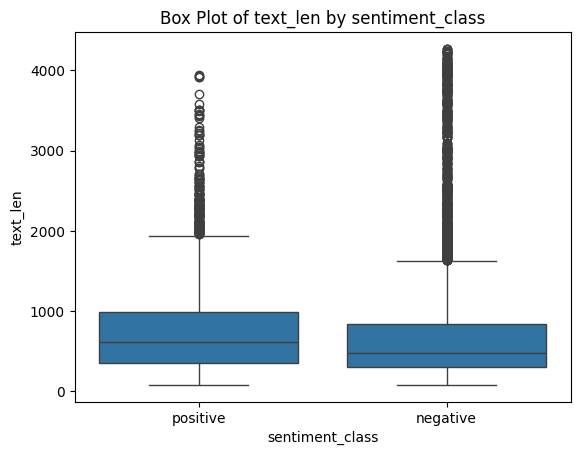

In [25]:
create_boxplot(df, 'text_len', 'sentiment_class')

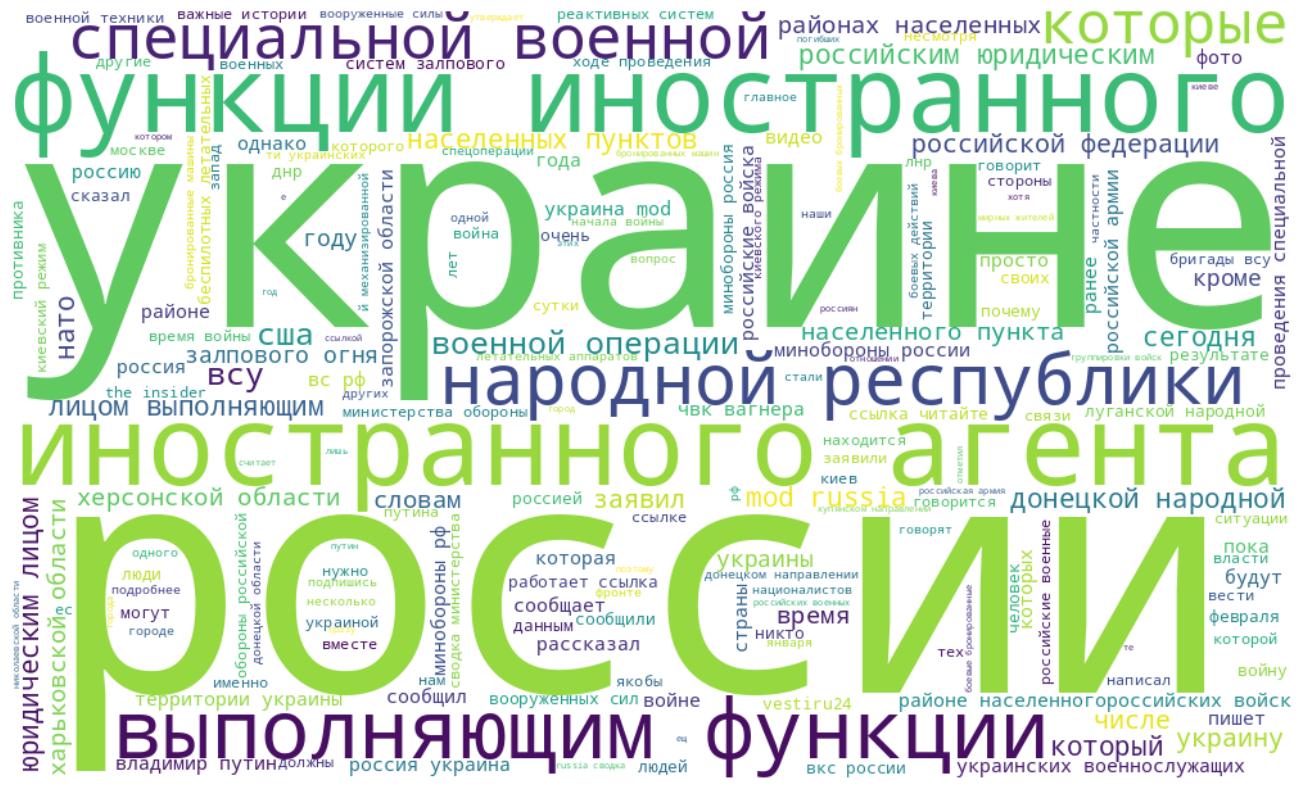

Word cloud saved to dataset_5_1_wordcloud.png


In [26]:
create_wordcloud(df, 'text_file_content', stop_words = set(ru_stopwords['word_list'].values), width = 1000, height=600, output_image_path='dataset_5_1_wordcloud.png')

In [28]:
# df['language'] = df['text_file_content'].apply(detect_language_safe) #long execution time

In [29]:
df['language'].value_counts()

language
ru    13113
bg        1
Name: count, dtype: int64

In [38]:
df.loc[(df['language'] == 'bg'), ['text_file_content']].values[0][0]

'    парламент финляндии ратифицирует членство в нато 28 февраля     глава комитета'

**Summary**

The dataset is designed for binary classification problem. It contains russian news about The Russo-Ukrainian War. The classes tells not about sentiment itself (in terms of text's emotion), but rather about news orientation towards Ukraine. 'Positive' news are more 'favorable' for Ukraine and 'negative' is unfavorable.  

### autotrain_TG_sentiment overview

### TRWU (**T**elegram news about the **R**ussian **W**ar in **U**kraine) overview

In [2]:
df = pd.read_csv('./data/truw.tsv',sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276309 entries, 0 to 276308
Data columns (total 10 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Unnamed: 0                              276309 non-null  int64 
 1   message_id                              276309 non-null  int64 
 2   Date                                    276309 non-null  object
 3   text                                    276309 non-null  object
 4   channel_name                            276309 non-null  object
 5   channel_attitude                        276309 non-null  object
 6   gpt_geopolitical_attitude_standardized  276309 non-null  object
 7   gpt_sentiment                           276309 non-null  object
 8   pymorphy_sentiment                      276309 non-null  object
 9   gpt_hate_or_discrimination              276309 non-null  object
dtypes: int64(2), object(8)
memory usage: 21.1+ MB


In [5]:
df['gpt_sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [6]:
df['gpt_sentiment'].value_counts()

gpt_sentiment
negative    146808
neutral      92331
positive     37170
Name: count, dtype: int64